In [7]:
import datetime
from datetime import date
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
import pandas as pd
from sklearn.svm import SVR
import csv
import numpy as np
from pandas import concat
from math import sqrt
from sklearn.metrics import mean_squared_error
from google.colab import drive

drive.mount('/content/drive')

#df = pd.read_csv('/content/drive/MyDrive/CS229_Project/pacifica_oct_lmp.csv')
df = pd.read_csv('/content/drive/MyDrive/CS229_Project/bellehaven_2019.csv')

images_dir = '/content/drive/MyDrive/CS229_Project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Test RMSE: 8.618


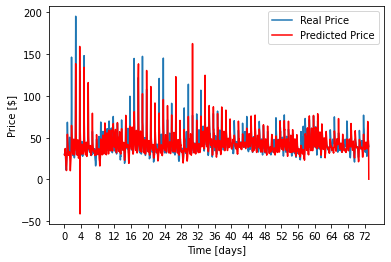

In [12]:

def predict_price(X_train,y_train, X_test):
  #reshape data into 2D array to feed into SVR model
  X_train = np.reshape(X_train[:,0],(X_train.shape[0], 1)) 
  X_test = np.reshape(X_test[:,0],(X_test.shape[0], 1)) 
  svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 1) 
  svr_rbf.fit(X_train, y_train)
  y_predict=svr_rbf.predict(X_test)
  return y_predict

def train_split(df, split=0.8, sequence_length=25, shift=1):
  num_train = round(split * df.shape[0])
  X_train = np.zeros((num_train-sequence_length,sequence_length-shift))
  for i in range(sequence_length, num_train):
    X_train[i-sequence_length,:]=df['MW'][i-(sequence_length-shift):i]
  y_train=list(df['MW'][sequence_length:num_train])
  return X_train, y_train

def test_split(df, split = 0.8, sequence_length = 25, shift = 1):
  num_train = round(split * df.shape[0])
  X_test=np.zeros((df['MW'].shape[0]-num_train,sequence_length-shift))
  test_in = df['MW'][df['MW'].shape[0] - X_test.shape[0] - sequence_length:]
  #shift X-test data by 1
  for i in range(sequence_length, X_test.shape[0]+sequence_length-1):  
    X_test[i-sequence_length,:]=test_in[i-(sequence_length-shift):i]
  y_test=test_in[sequence_length:]
  return X_test, y_test

def RMSE(actual, predicted):
  # calculate RMSE
  rmse = sqrt(mean_squared_error(actual, predicted))
  print('Test RMSE: %.3f' % rmse)
  return rmse

X_train, y_train = train_split(df)
X_test, y_test = test_split(df)
predicted = predict_price(X_train,y_train, X_test) 
rmse = RMSE(y_test.values, predicted)

# plot
fig,ax = plt.subplots()
plt.plot(y_test.values, label = 'Real Price')
plt.plot(predicted, color='red', label = 'Predicted Price')
plt.xlabel('Time [days]')
plt.xticks(ticks=np.arange(0, len(predicted), 96), labels=[4*int(x) for x in np.arange(0, len(predicted), 24)/24])

plt.ylabel('Price [$]')
plt.legend()
plt.savefig(f"{images_dir}/SVR_25seqlen_1oldlag.png", dpi=500)
plt.show()
